In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Anlyzing Lithium Carbonate in Blood Data

In [2]:
# Attaches the csv file into a df variable
df = pd.read_csv("../data/20_sample_data.csv")

# Shows the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       20 non-null     int64  
 1   gender       20 non-null     int64  
 2   age          20 non-null     int64  
 3   time_last    20 non-null     int64  
 4   temp         20 non-null     float64
 5   heartrate    20 non-null     int64  
 6   respiratory  20 non-null     int64  
 7   systolic     20 non-null     int64  
 8   diastolic    20 non-null     int64  
 9   BOS          20 non-null     int64  
 10  Li-Conc      20 non-null     float64
dtypes: float64(2), int64(9)
memory usage: 1.8 KB


#### Looking at a Heatmap

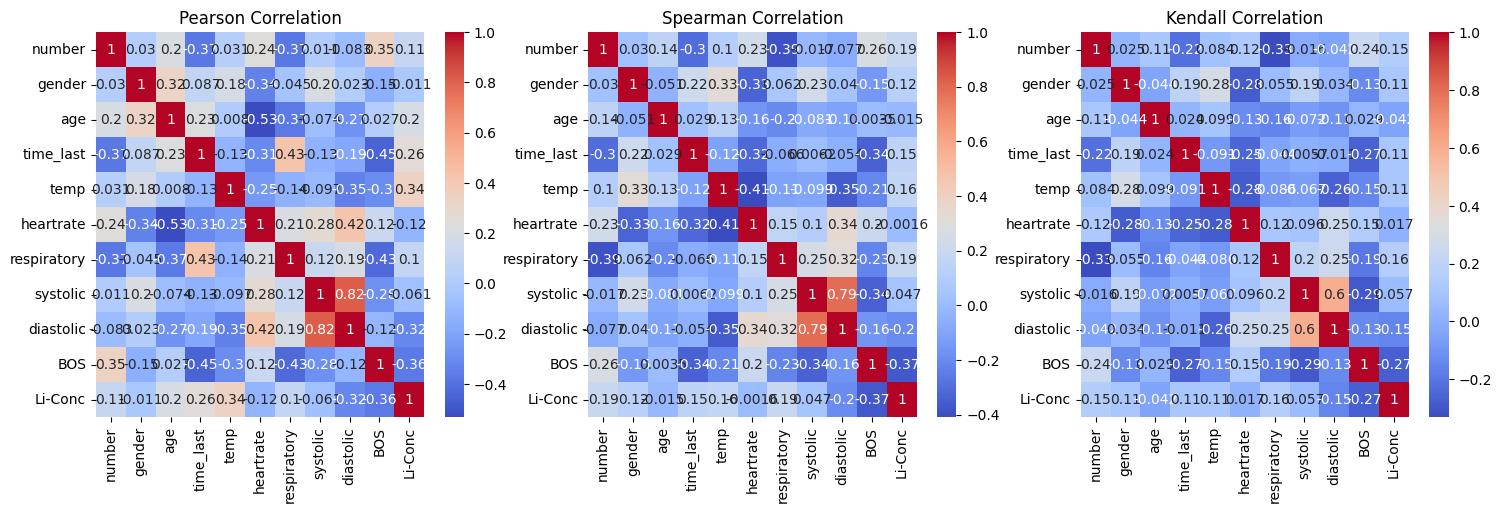

In [3]:
# Use a correlation heatmap on the dataframe

# Calculate different types of correlations
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Plot heatmaps
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')

plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation')

plt.subplot(1, 3, 3)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation')
plt.show()

## Model Training

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Which columns will be the feature and which ONE will be the target

features = df[['gender', 'age', 'time_last', 'temp', 'heartrate', 'respiratory', 'systolic',
               'diastolic', 'BOS']]
target = df['Li-Conc']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 12)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Machine Learning Models and Training

In [10]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),    
}

# Train and Evaluate the Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name}: Mean Squared Error =  {mse}')

Linear Regression: Mean Squared Error =  6.362840485839683
Ridge Regression: Mean Squared Error =  5.585406473084022
Lasso Regression: Mean Squared Error =  4.850568749999999
Decision Tree: Mean Squared Error =  14.061449999999999
Random Forest: Mean Squared Error =  7.545286092500001
Gradient Boosting: Mean Squared Error =  10.796396150595434
Support Vector Machine: Mean Squared Error =  5.573277513002039


### Neural Networks

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the Sequential Model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

# Compile the Model
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Evasluate the model
history = model.fit(X_train, y_train, epochs = 500, batch_size = 8, validation_split = 0.2)

# Predict the values and Accuracy
loss, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {mse}')

Epoch 1/500


c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 4.3459 - mean_squared_error: 4.3459 - val_loss: 1.2030 - val_mean_squared_error: 1.2030
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.1588 - mean_squared_error: 3.1588 - val_loss: 1.4055 - val_mean_squared_error: 1.4055
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4777 - mean_squared_error: 2.4777 - val_loss: 1.5716 - val_mean_squared_error: 1.5716
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.1604 - mean_squared_error: 2.1604 - val_loss: 1.7027 - val_mean_squared_error: 1.7027
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.9303 - mean_squared_error: 1.9303 - val_loss: 1.7442 - val_mean_squared_error: 1.7442
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8768 - mean_squared_error: 1.8768 - val_loss: 1.7232 - val_mean_squared_error: 1.7232
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.6187 - mean_squared_error: 1.6187 - val_loss: 1.7029 - val_mean_squared_err

#### Graph of Neural Network

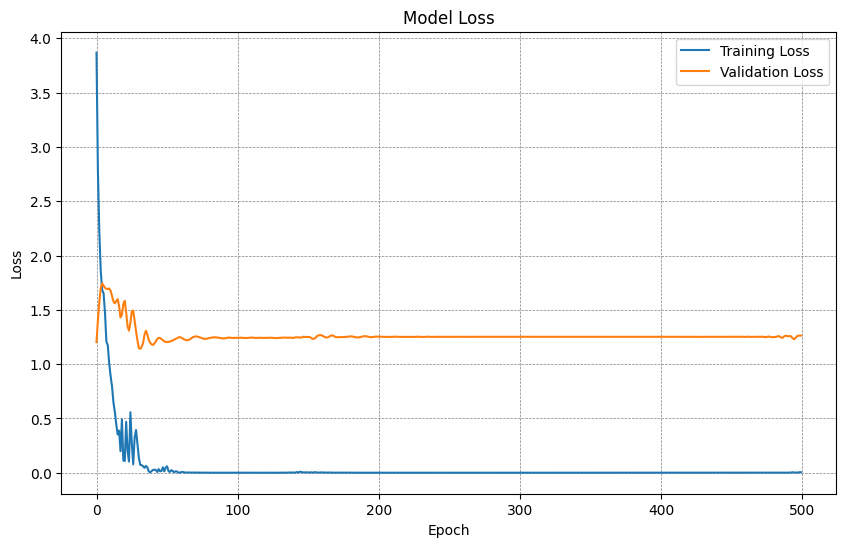

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()